# CIFAR-10 Image Classification

## Table of Contents
- [Introduction](#introduction)
- [Import the dataset](#import-the-dataset)
- [Investigate and preprocess the dataset](#investigate-and-preprocess-the-dataset)
- [Evaluating model performance](#evaluating-model-performance)
- [Build a simple neural network](#build-a-simple-neural-network)

## Introduction <a class="anchor" id="introduction"></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

## Import the dataset <a class="anchor" id="import-the-dataset"></a>

Import the CIFAR-10 dataset from Keras using the load_data function

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Investigate and preprocess the dataset <a class="anchor" id="investigate-and-preprocess-the-dataset"></a>

Investigate the properties of the training and test data

In [3]:
print(f"Number of training data rows: {x_train.shape[0]}")
print(f"Number of test data rows: {x_test.shape[0]}")
print(f'Resolution of each image: {x_train.shape[1]} x {x_train.shape[2]}')
print(f'Number of channels: {x_train.shape[3]}')
print(f'Number of classes: {len(np.unique(y_train))}')

Number of training data rows: 50000
Number of test data rows: 10000
Resolution of each image: 32 x 32
Number of channels: 3
Number of classes: 10


We can see that there are 50,000 training images and 10,000 test images meaning that the dataset is split into ~83% training and ~17% test data. Each image is 32x32 pixels with 3 channels (RGB).

In order to effectively compare the models, we need to create a validation set. In this case, we will take 20% of the training set as the validation set.

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Display an image corresponding to each of the 10 classes using matplotlib

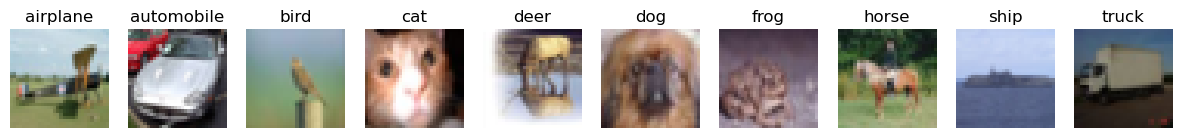

In [5]:
target_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

figure, axis = plt.subplots(1, 10, figsize=(15, 1.5))
for i, target in enumerate(target_names):
    axis[i].imshow(x_train[np.where(y_train == i)[0][0]])
    axis[i].set_title(target)
    axis[i].axis("off")
plt.show()

As the images use the RGB colour model, the pixel values for each image are positive integers in the range of [0,255]. Therefore, we need to normalise the pixel values into the range of [0,1].

In [6]:
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

## Evaluating model performance <a class="anchor" id="evaluating-model-performance"></a>

Create a function to display the accuracy and loss of the model over the training and validation sets

In [7]:
def plot_training_accuracy_loss(history):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].plot(history.history['accuracy'], label='Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='lower right')

    axs[1].plot(history.history['loss'], label='Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Model Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend(loc='upper right')

    plt.show()

Create a function to display the confusion matrix of the model

In [8]:
def confusion_matrix(model):
    predictions = model.predict(x_test)
    predictions = np.argmax(predictions, axis=1)
    cm = tf.math.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.show()

Create a function to calculate the accuracy and loss of the model on the test set

In [9]:
def test_model(model):
    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'Test accuracy: {test_acc}')
    print(f'Test loss: {test_loss}')
    # Create a confusion matrix
    confusion_matrix(model)

## Build a simple neural network

Create a simple neural network consisting of a single fully connected layer as a baseline:

- The first layer is a convolutional layer with 32 filters, a kernel size of 3x3. The input shape is 32x32x3 (the 3 corresponds to the 3 channels in the RGB colour model).
- This 1D array is passed to a single fully connected layer with 10 neurons and a softmax activation function, where each neuron corresponds to a class.
- The output of the softmax activation function is a probability distribution over the 10 classes in the CIFAR-10 dataset.

Start by using:
- ReLU activation function (as it is a good default choice)
- Adam optimiser (as it is a good default choice)
- Sparse categorical cross-entropy loss function (as the labels are integers and this is a good choice according to [the documentation](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class))

In [11]:
single_layer_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])
single_layer_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']
                           )

Train the model for 100 epochs with a batch size of 64 on the training data and evaluate the model on the validation data

In [12]:
single_layer_model_history = single_layer_model.fit(x_train, y_train, batch_size=64, epochs=100,
                                                    validation_data=(x_val, y_val))

Epoch 1/100
625/625 [==============================] - 5s 3ms/step - loss: 1.5540 - accuracy: 0.4565 - val_loss: 1.3490 - val_accuracy: 0.5250
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 1.2518 - accuracy: 0.5645 - val_loss: 1.2791 - val_accuracy: 0.5577
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 1.1363 - accuracy: 0.6065 - val_loss: 1.2503 - val_accuracy: 0.5654
Epoch 4/100
625/625 [==============================] - 2s 4ms/step - loss: 1.0515 - accuracy: 0.6359 - val_loss: 1.2051 - val_accuracy: 0.5889
Epoch 5/100
625/625 [==============================] - 2s 4ms/step - loss: 0.9758 - accuracy: 0.6652 - val_loss: 1.2143 - val_accuracy: 0.5861
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 0.9115 - accuracy: 0.6849 - val_loss: 1.1812 - val_accuracy: 0.5931
Epoch 7/100
625/625 [==============================] - 1s 2ms/step - loss: 0.8500 - accuracy: 0.7099 - val_loss: 1.1781 - val_accuracy: 0.6044

Evaluate the model by plotting the accuracy and loss over the training and validation sets

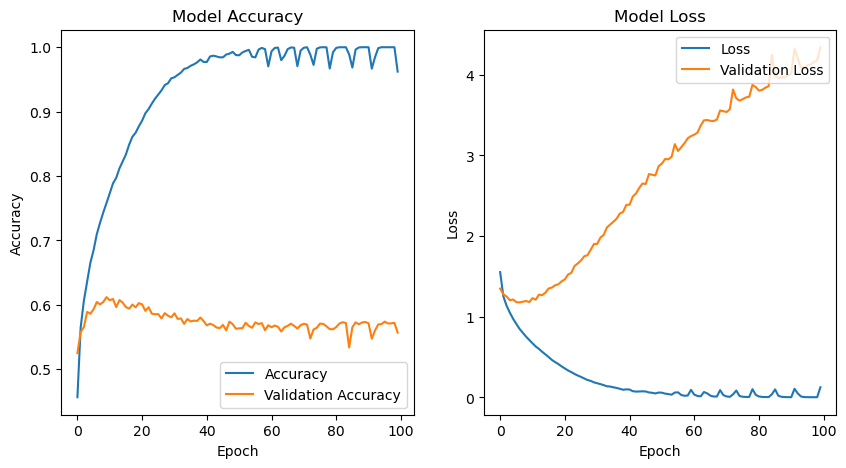

In [13]:
plot_training_accuracy_loss(single_layer_model_history)

Run the model on the test set and display the confusion matrix

313/313 - 1s - loss: 4.3795 - accuracy: 0.5528 - 665ms/epoch - 2ms/step
Test accuracy: 0.5527999997138977
Test loss: 4.3795270919799805
313/313 [==============================] - 0s 946us/step


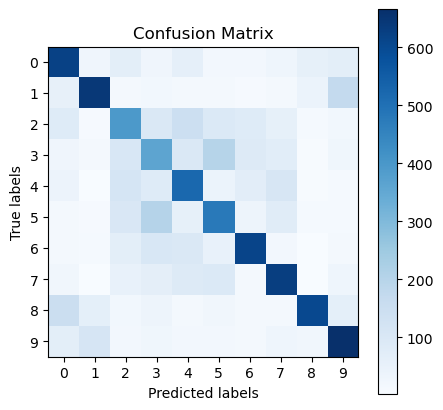

In [14]:
test_model(single_layer_model)

It is clear that the model is overfitting the training data because the validation loss begins to increase after about 10 epochs and the training accuracy approaches 1.0. Later, regularisation will be explored to reduce overfitting. First, lets compare the performance of the model with different activation functions.

### Compare with different activation functions

In order to compare the performance of the model with different activation functions, we will create a model for each activation function and train it for 100 epochs. Then, the validation accuracy will be plotted for each model so that they can be compared.

Epoch 1/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5042 - accuracy: 0.4707 - val_loss: 1.3068 - val_accuracy: 0.5355
Epoch 2/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.2266 - accuracy: 0.5745 - val_loss: 1.2534 - val_accuracy: 0.5631
Epoch 3/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.0914 - accuracy: 0.6237 - val_loss: 1.2222 - val_accuracy: 0.5786
Epoch 4/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.9705 - accuracy: 0.6660 - val_loss: 1.2435 - val_accuracy: 0.5714
Epoch 5/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.8755 - accuracy: 0.6979 - val_loss: 1.1844 - val_accuracy: 0.5969
Epoch 6/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7894 - accuracy: 0.7291 - val_loss: 1.2495 - val_accuracy: 0.5893
Epoch 7/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7199 - accuracy: 0.7539 - val_loss: 1.2630 - val_ac

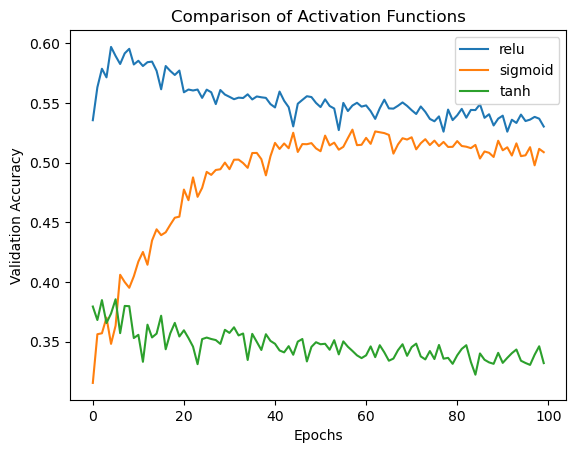

In [38]:
# Create a list of activation functions to compare
activation_functions = ['relu', 'sigmoid', 'tanh']

# Create a model for each activation function and train it for 100 epochs, then plot the validation accuracy
for activation in activation_functions:
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=(32, 32, 3)),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
    plt.plot(history.history['val_accuracy'], label=activation)

plt.title('Comparison of Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

The graph shows that the ReLU activation function performs better than the sigmoid and tanh activation functions as the validation accuracy is higher acoss all epochs. Therefore the ReLU activation function will be used for the rest of the comparisons for this model, although it will be worth performing this comparison on other models to see if ReLU is consistently the best activation function for CNNs.

### Compare with different optimisers

Epoch 1/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4894 - accuracy: 0.4756 - val_loss: 1.3295 - val_accuracy: 0.5359
Epoch 2/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.2118 - accuracy: 0.5805 - val_loss: 1.2486 - val_accuracy: 0.5653
Epoch 3/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.0768 - accuracy: 0.6256 - val_loss: 1.2566 - val_accuracy: 0.5650
Epoch 4/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.9861 - accuracy: 0.6621 - val_loss: 1.2946 - val_accuracy: 0.5629
Epoch 5/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.8987 - accuracy: 0.6903 - val_loss: 1.2445 - val_accuracy: 0.5828
Epoch 6/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.8242 - accuracy: 0.7163 - val_loss: 1.2194 - val_accuracy: 0.5960
Epoch 7/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7615 - accuracy: 0.7382 - val_loss: 1.3024 - val_ac

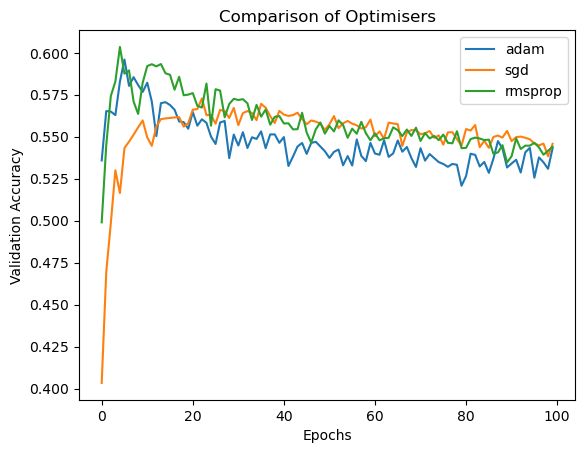

In [39]:
optimisers = ['adam', 'sgd', 'rmsprop']

for optimiser in optimisers:
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
    plt.plot(history.history['val_accuracy'], label=optimiser)

plt.title('Comparison of Optimisers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

This graph shows that the performance of the model is relatively similar for all optimisers. Throughout the training, each of the optimisers performs better than the others at some point, but the differences are not significant after the first few epochs. Therefore, the Adam optimiser will continue to be used for the rest of the comparisons with this model, although it will be worth performing this comparison on other models to see which optimiser is consistently the best.

### Compare the performance of the model with regularisation.

To reduce overfitting, regularisation can be applied to the model. One way to do this is to add a dropout layer to the model, which will randomly drop out a percentage of the neurons in the layer to prevent the model from relying on a single neuron. As the model is overfitting quite significantly, a dropout rate of 0.8 will be used.

In [22]:
single_layer_model_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dropout(0.8),
    Dense(10, activation='softmax')
])
single_layer_model_dropout.compile(optimizer='adam',
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy']
                                   )

In [23]:
history = single_layer_model_dropout.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
625/625 [==============================] - 2s 3ms/step - loss: 1.6278 - accuracy: 0.4254 - val_loss: 1.4065 - val_accuracy: 0.5166
Epoch 2/100
625/625 [==============================] - 1s 2ms/step - loss: 1.4059 - accuracy: 0.5069 - val_loss: 1.3333 - val_accuracy: 0.5344
Epoch 3/100
625/625 [==============================] - 1s 2ms/step - loss: 1.3610 - accuracy: 0.5241 - val_loss: 1.2944 - val_accuracy: 0.5475
Epoch 4/100
625/625 [==============================] - 1s 2ms/step - loss: 1.3220 - accuracy: 0.5401 - val_loss: 1.2818 - val_accuracy: 0.5547
Epoch 5/100
625/625 [==============================] - 1s 2ms/step - loss: 1.3055 - accuracy: 0.5424 - val_loss: 1.2728 - val_accuracy: 0.5564
Epoch 6/100
625/625 [==============================] - 1s 2ms/step - loss: 1.2770 - accuracy: 0.5542 - val_loss: 1.3096 - val_accuracy: 0.5409
Epoch 7/100
625/625 [==============================] - 1s 2ms/step - loss: 1.2506 - accuracy: 0.5612 - val_loss: 1.2336 - val_accuracy: 0.5745

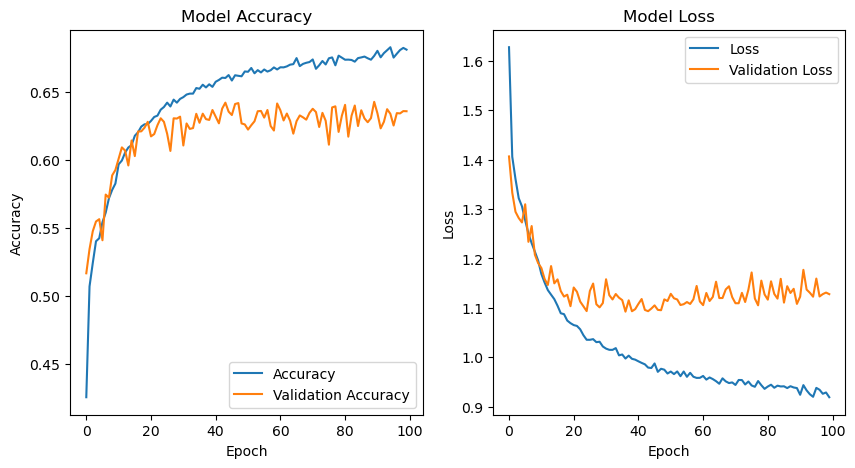

In [24]:
plot_training_accuracy_loss(history)

313/313 - 1s - loss: 1.1271 - accuracy: 0.6322 - 648ms/epoch - 2ms/step
Test accuracy: 0.6322000026702881
Test loss: 1.1271167993545532
313/313 [==============================] - 0s 966us/step


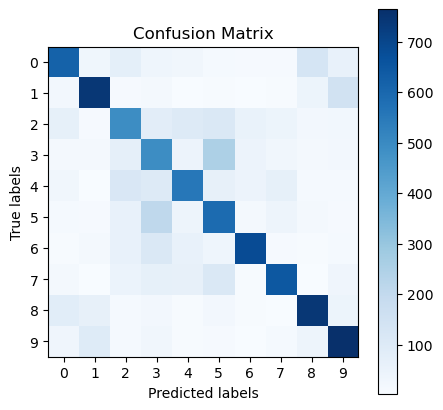

In [25]:
test_model(single_layer_model_dropout)

It is now evident that the model is not overfitting the training data as much as before as the model's validation accuracy is much closer to the validation accuracy and the validation loss is much lower. This is also reflected in the test accuracy, which has now increased

## Build a more complex neural network

Create a more complex neural network consisting of 3 convolutional layers with max pooling layers between them, followed by a flatten layer and 2 dense layers.

Model architecture: *TensorFlow. Convolutional Neural Networks (CNN) - TensorFlow Core. [online] Available at: https://www.tensorflow.org/tutorials/images/cnn [Accessed 6 March 2023]*.

- The first convolutional layer has 32 filters of size 3x3, whereas the second and third convolutional layers have 64 filters of size 3x3.
- The max pooling layers inbetween each convolutional layer has a pool size of 2x2.
- The output of the final convolutional layer is flattened and passed to a dense layer with 64 neurons.
- The final dense layer has 10 neurons and a softmax activation function, where each neuron corresponds to a class.

Again, start by using:
- ReLU activation function for the convolutional layers (as it is a good default choice)
- Adam optimiser (as it is a good default choice)
- Sparse categorical cross-entropy loss function (as the labels are integers and this is a good choice according to [the documentation](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class))
- Accuracy metric (as it is a good default choice)

In [10]:
multi_layer_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
multi_layer_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
                          )

Train the model for 100 epochs with a batch size of 64 on the training data and evaluate the model on the validation data

In [11]:
history = multi_layer_model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
625/625 [==============================] - 5s 4ms/step - loss: 1.6489 - accuracy: 0.3970 - val_loss: 1.4589 - val_accuracy: 0.4710
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 1.2856 - accuracy: 0.5414 - val_loss: 1.1862 - val_accuracy: 0.5779
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 1.1317 - accuracy: 0.5998 - val_loss: 1.1101 - val_accuracy: 0.6110
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 1.0278 - accuracy: 0.6380 - val_loss: 0.9960 - val_accuracy: 0.6503
Epoch 5/100
625/625 [==============================] - 2s 3ms/step - loss: 0.9551 - accuracy: 0.6648 - val_loss: 0.9908 - val_accuracy: 0.6532
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 0.9014 - accuracy: 0.6837 - val_loss: 0.9366 - val_accuracy: 0.6773
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 0.8592 - accuracy: 0.6995 - val_loss: 0.9394 - val_accuracy: 0.6725

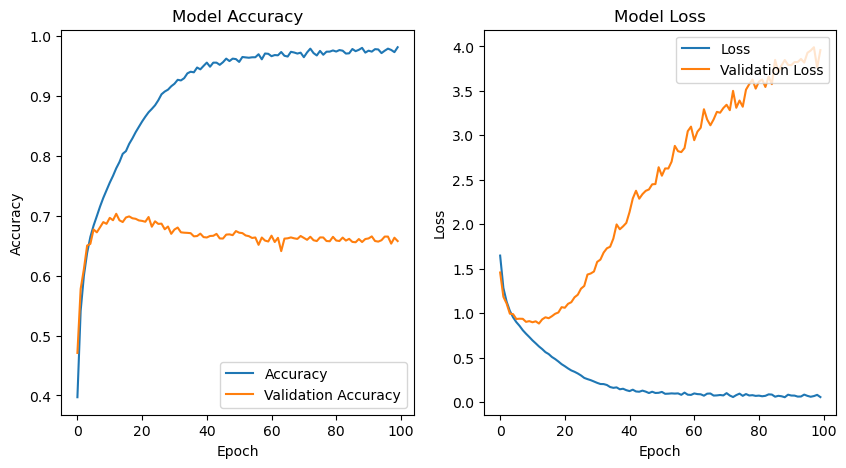

In [12]:
plot_training_accuracy_loss(history)

313/313 - 1s - loss: 3.9208 - accuracy: 0.6624 - 570ms/epoch - 2ms/step
Test accuracy: 0.6624000072479248
Test loss: 3.92082142829895
313/313 [==============================] - 0s 1ms/step


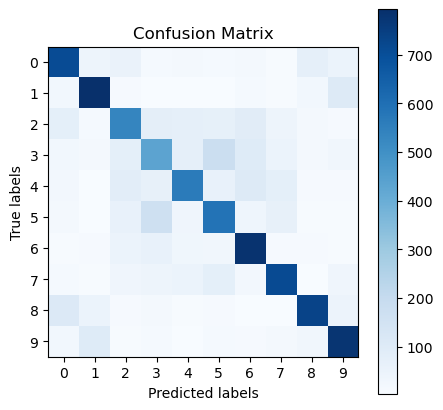

In [13]:
test_model(multi_layer_model)

As expected, this model performs much better than the single layer model, as evidenced by greater test accuracy. However, similar to the single layer model, the model is overfitting the training data. As a result, regularisation will be applied to the model at a later stage - first the different activation functions will be compared.

### Compare different activation functions

For this model, only the activation functions for the convolutional layers will be modified to keep the comparison as consistent as possible. The activation function for the dense layers will remain as ReLU, as it is a good default choice.

Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5911 - accuracy: 0.4151 - val_loss: 1.4528 - val_accuracy: 0.4959
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2254 - accuracy: 0.5656 - val_loss: 1.1416 - val_accuracy: 0.5931
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0705 - accuracy: 0.6235 - val_loss: 1.0745 - val_accuracy: 0.6214
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9724 - accuracy: 0.6600 - val_loss: 0.9807 - val_accuracy: 0.6557
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8968 - accuracy: 0.6861 - val_loss: 0.9964 - val_accuracy: 0.6572
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8314 - accuracy: 0.7077 - val_loss: 0.9244 - val_accuracy: 0.6816
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7840 - accuracy: 0.7271 - val_loss: 0.9198 - val_ac

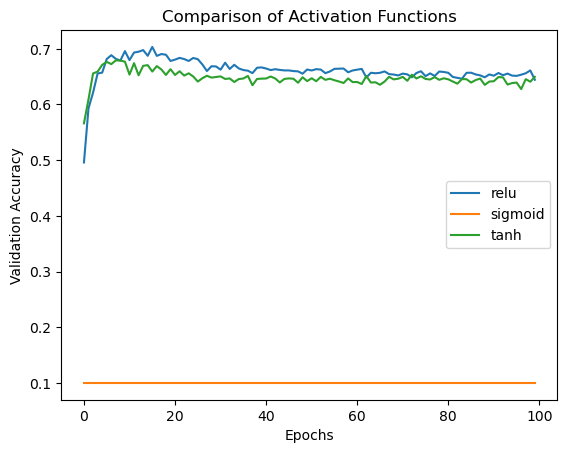

In [14]:
# Create a list of activation functions to compare
activation_functions = ['relu', 'sigmoid', 'tanh']

# Create a model for each activation function and train it for 100 epochs, then plot the validation accuracy
for activation in activation_functions:
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
    plt.plot(history.history['val_accuracy'], label=activation)

plt.title('Comparison of Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### Compare with different optimisers

In [ ]:
# Create a list of optimisers to compare
optimisers = ['adam', 'sgd', 'rmsprop']

# Create a model for each optimiser and train it for 100 epochs, then plot the validation accuracy
for optimiser in optimisers:
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
    plt.plot(history.history['val_accuracy'], label=optimiser)

In [15]:
multi_layer_model_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
multi_layer_model_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
                                  )

## Build a Deep Convolutional Neural Network with VGG architecture

Since we've built a simple CNN and a more complex CNN, let's now build a deep CNN using the VGG architecture which is a popular architecture for image classification. CNN's with VGG architecture consist of a stack of VGG blocks followed by a fully connected layer. A VGG block consists of 2 convolutional layers with 3x3 filters and 32 filters each, followed by a max pooling layer with a 2x2 filter.

Architecture taken from: *Simonyan, K., & Zisserman, A. (2015). Very deep convolutional networks for large-scale image recognition. In Proceedings of the International Conference on Learning Representations (ICLR)*.

In [17]:
# Create a function to create a VGG block with a custom number of filters
def VGGBlock(filters=32, activation='relu', input_shape=None):
    model = Sequential([
        Conv2D(filters, (3, 3), activation=activation, padding='same', input_shape=input_shape),
        Conv2D(filters, (3, 3), activation=activation, padding='same'),
        MaxPooling2D((2, 2))
    ])
    return model

### Single VGG Block

The first deep CNN we will build will consist of a single VGG block. The output is flattened and passed to a Dense layer with 128 neurons and a ReLU activation function. The output is then passed to another Dense layer with 10 neurons and a softmax activation function.

In [18]:
vgg_single_block_model = Sequential([
    VGGBlock(filters=32, activation='relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
vgg_single_block_model.compile(optimizer='adam',
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

Train the model for 100 epochs with a batch size of 64 on the training data and evaluate the model on the validation data

Epoch 1/100
625/625 [==============================] - 2s 3ms/step - loss: 1.4495 - accuracy: 0.4832 - val_loss: 1.2254 - val_accuracy: 0.5660
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 1.0736 - accuracy: 0.6212 - val_loss: 1.0417 - val_accuracy: 0.6342
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 0.9127 - accuracy: 0.6824 - val_loss: 0.9948 - val_accuracy: 0.6541
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 0.7929 - accuracy: 0.7244 - val_loss: 0.9799 - val_accuracy: 0.6581
Epoch 5/100
625/625 [==============================] - 2s 3ms/step - loss: 0.6989 - accuracy: 0.7566 - val_loss: 0.9691 - val_accuracy: 0.6711
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 0.6011 - accuracy: 0.7914 - val_loss: 0.9947 - val_accuracy: 0.6740
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5090 - accuracy: 0.8232 - val_loss: 1.0278 - val_accuracy: 0.6819

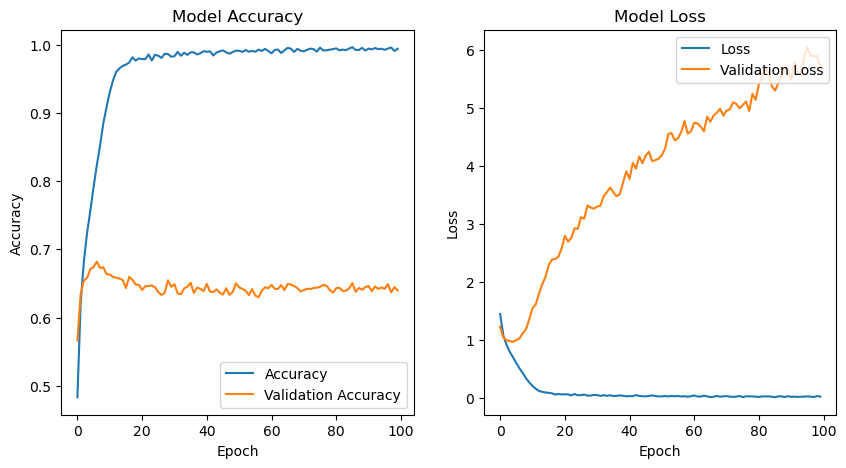

In [19]:
train_history = vgg_single_block_model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))
plot_training_accuracy_loss(train_history)

Evaluate the model on the test set - the expected accuracy should be much higher than the simple neural network

313/313 - 1s - loss: 6.4474 - accuracy: 0.6340 - 780ms/epoch - 2ms/step
Test accuracy: 0.6340000033378601
Test loss: 6.447403430938721
313/313 [==============================] - 0s 1ms/step


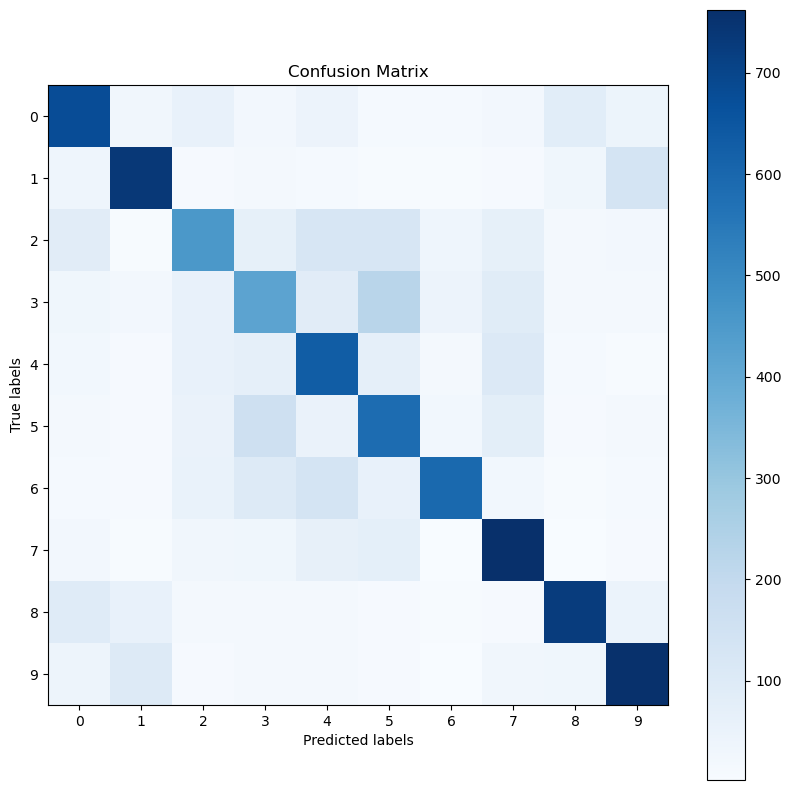

In [24]:
test_model(vgg_single_block_model)

As expected, the accuracy is higher than the simple neural network. This is reflected in the confusion matrix, where the model is much better at predicting the correct class for each image (the diagonal is much lighter than the simple neural network's confusion matrix).

However, the model is rapidly overfitting the validation data set after a few epochs. This may be because the model is too complex for the small dataset, therefore we could add regularisation to the model, which is done later in this section.

### Double VGG Block

Lets try adding another VGG block with 64 filters to the model and see how it affects the accuracy.

In [ ]:
vgg_double_block_model = Sequential([
    VGGBlock(filters=32, activation='relu', input_shape=(32, 32, 3)),
    VGGBlock(filters=64, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
vgg_double_block_model.compile(optimizer='adam',
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

In [ ]:
train_history = vgg_double_block_model.fit(x_train, y_train, batch_size=64, epochs=100,
                                           validation_data=(x_test, y_test))
plot_training_accuracy_loss(train_history)

In [ ]:
test_model(vgg_double_block_model)

### Model Regularisation

In each of the graphs displaying the loss of each model, the validation loss is shown to decrease for several epochs before increasing again. This signals that the model is overfitting the training data which means we need to add regularisation to the model.

The different types of regularisation that will be compared are: dropout regularisation, weight decay and data augmentation.

The first type that will be explored is dropout regularisation which is a technique where neurons are selected at random and dropped out of the network during training. This reduces the chance of overfitting by preventing the model from relying on specific neurons.

In [ ]:
vgg_single_block_model_reg = Sequential([
    VGGBlock(filters=32, activation='relu', input_shape=(32, 32, 3)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
vgg_single_block_model_reg.compile(optimizer='adam',
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy'])

In [ ]:
train_history = vgg_single_block_model_reg.fit(x_train, y_train, batch_size=64, epochs=100,
                                               validation_data=(x_test, y_test))
plot_training_accuracy_loss(train_history)

In [ ]:
test_model(vgg_single_block_model_reg)

## Build a Convolutional Neural Network with ResNet architecture

In [25]:
from tensorflow.keras.layers import Add, BatchNormalization, Activation

In [28]:
def ResBlock(filters=32, activation='relu', input_shape=None):
    inputs = Input(shape=input_shape)
    layers = Conv2D(filters, (3, 3), padding='same')(inputs)
    layers = BatchNormalization()(layers)
    layers = Activation(activation)(layers)
    layers = Conv2D(filters, (3, 3), padding='same')(layers)
    layers = BatchNormalization()(layers)
    layers = Add()([layers, inputs])
    layers = Activation(activation)(layers)
    return layers

In [29]:
res_single_block_model = Sequential([
    ResBlock(filters=32, activation='relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
res_single_block_model.compile(optimizer='adam',
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

ValueError: Inputs have incompatible shapes. Received shapes (32, 32, 32) and (32, 32, 3)

In [ ]:
train_history = res_single_block_model.fit(x_train, y_train, batch_size=64, epochs=100,
                                           validation_data=(x_test, y_test))
plot_training_accuracy_loss(train_history)

In [ ]:
test_model(res_single_block_model)

In [ ]:
res_single_block_model_reg = Sequential([
    ResBlock(filters=32, activation='relu', input_shape=(32, 32, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
res_single_block_model_reg.compile(optimizer='adam',
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy'])

In [ ]:
train_history = res_single_block_model_reg.fit(x_train, y_train, batch_size=64, epochs=100,
                                               validation_data=(x_test, y_test))
plot_training_accuracy_loss(train_history)

In [ ]:
test_model(res_single_block_model_reg)